In [1]:
'''pip install emoji'''

'pip install emoji'

In [2]:
import pandas as pd
from collections import Counter
import plotly.express as px
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from pathlib import Path

In [4]:
file_path = Path('../data/haspeede2_dev/haspeede2_dev_taskAB.tsv')

In [5]:
df = pd.read_csv(file_path, sep='\t', on_bad_lines='warn')

In [6]:
df

,id,text,hs,stereotype
0,2066,"È terrorismo anche questo, per mettere in uno ...",0,0
1,2045,@user @user infatti finché ci hanno guadagnato...,0,0
2,61,"Corriere: Tangenti, Mafia Capitale dimenticata...",0,0
3,1259,"@user ad uno ad uno, perché quando i migranti ...",0,0
4,949,Il divertimento del giorno? Trovare i patrioti...,0,0
...,...,...,...,...
6832,9340,Gli stati nazionali devono essere pronti a rin...,0,0
6833,9121,Il ministro dell'interno della Germania #Horst...,0,0
6834,8549,#Salvini: In Italia troppi si sono montati la ...,0,0
6835,9240,@user @user Chi giubila in buona fede non ha c...,0,0


In [7]:
# Rimuove "@user" dalla colonna text
df['text '] = df['text '].str.replace(r'@user', '', regex=True)
df['text '] = df['text '].str.replace(r'URL', '', regex=True)
df['text '] = df['text '].str.replace(r'#\S+', '', regex=True)
df['text '] = df['text '].str.replace(r'�', '', regex=True)
df


,id,text,hs,stereotype
0,2066,"È terrorismo anche questo, per mettere in uno ...",0,0
1,2045,infatti finché ci hanno guadagnato con i cam...,0,0
2,61,"Corriere: Tangenti, Mafia Capitale dimenticata...",0,0
3,1259,"ad uno ad uno, perché quando i migranti israe...",0,0
4,949,Il divertimento del giorno? Trovare i patrioti...,0,0
...,...,...,...,...
6832,9340,Gli stati nazionali devono essere pronti a rin...,0,0
6833,9121,Il ministro dell'interno della Germania facen...,0,0
6834,8549,"In Italia troppi si sono montati la testa, io...",0,0
6835,9240,Chi giubila in buona fede non ha capito nien...,0,0


In [8]:
emoticon_pattern = r'[:;=8xX][\-~]?[)\](DdpP3oO|/\\*<>]'
# Prova a trovare le emoticon
df['emoticons'] = df['text '].str.findall(emoticon_pattern).str.join(' ')

In [9]:
df

,id,text,hs,stereotype,emoticons
0,2066,"È terrorismo anche questo, per mettere in uno ...",0,0,
1,2045,infatti finché ci hanno guadagnato con i cam...,0,0,
2,61,"Corriere: Tangenti, Mafia Capitale dimenticata...",0,0,
3,1259,"ad uno ad uno, perché quando i migranti israe...",0,0,
4,949,Il divertimento del giorno? Trovare i patrioti...,0,0,
...,...,...,...,...,...
6832,9340,Gli stati nazionali devono essere pronti a rin...,0,0,
6833,9121,Il ministro dell'interno della Germania facen...,0,0,
6834,8549,"In Italia troppi si sono montati la testa, io...",0,0,
6835,9240,Chi giubila in buona fede non ha capito nien...,0,0,


# estrazione emoji

1.   Estraggo le emoji
2.   Le elimino dai tweet
3.   Inserisco le emoji estratte nella colonna emoji




In [10]:
# Lista specifica di emoji da includere
emoji_whitelist = ["▶️", "‼️", "⁉️"]

# Funzione aggiornata per estrarre emoji generali e della whitelist
def extract_emojis(text):
    if not text:
        return ''
    # Regex per emoji generali
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Simboli e pittogrammi
        u"\U0001F680-\U0001F6FF"  # Trasporti
        u"\U0001F700-\U0001F77F"
        u"\U0001F780-\U0001F7FF"  # Simboli geometrici estesi
        u"\U0001F800-\U0001F8FF"
        u"\U0001F900-\U0001F9FF"  # Faccine estese
        u"\U0001FA00-\U0001FA6F"
        u"\U0001FA70-\U0001FAFF"
        u"\U0001F1E0-\U0001F1FF"  # Bandiere
        u"\U00002700-\U000027BF"  # Simboli vari
        u"\U00002600-\U000026FF"  # Simboli come ☀️ e ⚡
        u"\U00002300-\U000023FF"  # Simboli extra
        u"\U00002B00-\U00002BFF"  # Frecce e simboli geometrici
        "]",
        flags=re.UNICODE,
    )
    # Combina whitelist e regex
    whitelist_pattern = re.compile('|'.join(map(re.escape, emoji_whitelist)))
    combined_pattern = re.compile(f"{emoji_pattern.pattern}|{whitelist_pattern.pattern}")
    return ''.join(combined_pattern.findall(text))

# Estrazione delle emoji
df['emojis'] = df['text '].apply(extract_emojis)

# Rimozione delle emoji dal testo
def remove_emojis(text):
    if not text:
        return text
    # Usa la stessa combinazione di pattern per rimuovere le emoji
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F700-\U0001F77F"
        u"\U0001F780-\U0001F7FF"
        u"\U0001F800-\U0001F8FF"
        u"\U0001F900-\U0001F9FF"
        u"\U0001FA00-\U0001FA6F"
        u"\U0001FA70-\U0001FAFF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002700-\U000027BF"
        u"\U00002600-\U000026FF"
        u"\U00002300-\U000023FF"
        u"\U00002B00-\U00002BFF"
        "]",
        flags=re.UNICODE,
    )
    whitelist_pattern = re.compile('|'.join(map(re.escape, emoji_whitelist)))
    combined_pattern = re.compile(f"{emoji_pattern.pattern}|{whitelist_pattern.pattern}")
    return combined_pattern.sub('', text)

df['text '] = df['text '].apply(remove_emojis)

# Rimuove eventuali spazi multipli residui
df['text '] = df['text '].str.strip().str.replace(r'\s+', ' ', regex=True)

# Analisi delle frequenze delle emoji
all_emojis = ''.join(df['emojis'])
emoji_frequencies = Counter(all_emojis)

# Ordina le emoji per frequenza
sorted_emoji_frequencies = dict(sorted(emoji_frequencies.items(), key=lambda item: item[1], reverse=True))

# Crea un DataFrame per visualizzare le frequenze
emoji_df = pd.DataFrame(sorted_emoji_frequencies.items(), columns=['Emoji', 'Frequenza'])

# Visualizza le prime 10 emoji in un grafico a barre
top_10_emojis = emoji_df.head(10)
fig = px.bar(top_10_emojis, x='Emoji', y='Frequenza', title='Top 10 Frequenze delle Emoji')
fig.show()

# Mostra il DataFrame aggiornato
print(df)


        id                                              text   hs  stereotype  \
0     2066  È terrorismo anche questo, per mettere in uno ...   0           0   
1     2045  infatti finché ci hanno guadagnato con i campi...   0           0   
2       61  Corriere: Tangenti, Mafia Capitale dimenticata...   0           0   
3     1259  ad uno ad uno, perché quando i migranti israel...   0           0   
4      949  Il divertimento del giorno? Trovare i patrioti...   0           0   
...    ...                                                ...  ..         ...   
6832  9340  Gli stati nazionali devono essere pronti a rin...   0           0   
6833  9121  Il ministro dell'interno della Germania facend...   0           0   
6834  8549  In Italia troppi si sono montati la testa, io ...   0           0   
6835  9240  Chi giubila in buona fede non ha capito niente...   0           0   
6836  8000  I giovani cristiani in sono indotti dagli isla...   0           1   

     emoticons emojis  
0  

In [11]:
df

,id,text,hs,stereotype,emoticons,emojis
0,2066,"È terrorismo anche questo, per mettere in uno ...",0,0,,
1,2045,infatti finché ci hanno guadagnato con i campi...,0,0,,
2,61,"Corriere: Tangenti, Mafia Capitale dimenticata...",0,0,,
3,1259,"ad uno ad uno, perché quando i migranti israel...",0,0,,
4,949,Il divertimento del giorno? Trovare i patrioti...,0,0,,
...,...,...,...,...,...,...
6832,9340,Gli stati nazionali devono essere pronti a rin...,0,0,,
6833,9121,Il ministro dell'interno della Germania facend...,0,0,,
6834,8549,"In Italia troppi si sono montati la testa, io ...",0,0,,
6835,9240,Chi giubila in buona fede non ha capito niente...,0,0,,


#Cre una nuova colonna dove unisco i risultati di "emoticons" e "emoji"

In [12]:
# Combina emoticons ed emojis in una nuova colonna
df['all_emoticons_emojis'] = df['emoticons'] + ' ' + df['emojis']
# Rimuove eventuali spazi extra nella nuova colonna
df['all_emoticons_emojis'] = df['all_emoticons_emojis'].str.strip().str.replace(r'\s+', ' ', regex=True)

# Elimino le due colonne ormai superflue

In [13]:
df.drop(columns=['emoticons', 'emojis'], inplace=True)

In [14]:
df

,id,text,hs,stereotype,all_emoticons_emojis
0,2066,"È terrorismo anche questo, per mettere in uno ...",0,0,
1,2045,infatti finché ci hanno guadagnato con i campi...,0,0,
2,61,"Corriere: Tangenti, Mafia Capitale dimenticata...",0,0,
3,1259,"ad uno ad uno, perché quando i migranti israel...",0,0,
4,949,Il divertimento del giorno? Trovare i patrioti...,0,0,
...,...,...,...,...,...
6832,9340,Gli stati nazionali devono essere pronti a rin...,0,0,
6833,9121,Il ministro dell'interno della Germania facend...,0,0,
6834,8549,"In Italia troppi si sono montati la testa, io ...",0,0,
6835,9240,Chi giubila in buona fede non ha capito niente...,0,0,


In [15]:
print(df['all_emoticons_emojis'].unique())

['' ':)' '😲' '✌' '😠' '🙄' '😁' ':D' '83' '😑' 'xo' 'xp' '😂😂' '☺' '👍🏼' '=\\'
 '8o' '😳🙄🤔🤓😂😂😂😂😂' '😡' '😄😄😄😄😄😄' '🤔🤔🤔' '🇬🇧' '✳✳' '❤' '🔥🔥' ':3' '🇮🇹' '😅' '😳'
 '🤕' '😳😳😉' ':-(' '😢' '😊👍' '🔹❓🔹🇮🇹❓' '👎' '💖' ':(' ':d' '😈' '👌' '😂😂😂😂😂😂' '8)'
 '😱😱😱' '👹' '🌿🌿' '🤔' '😂🙈' '⛔⛔⛔' '🤔😂' '😀👍✌' ':p' '📍' '😁😁😁' '😜' 'xP' '💣💥' '👍'
 '💩💩💩💩' '😒' '😷' '🕌💥🌍🤡🕋' '👏😡' 'XD' ':/' '🖒' ':o' '😥' '🙄🙄' '🔴🔴👇🏿' '💩💩' '🙄🤔🤨'
 '😣😣' '‼️⁉️' '🇮🇹🤔💥🇮🇹' ';p' '💩' '😤' '🤦♀🤦♀🤣🤣🤣🤣' '🤣🤣🤣😂😂😂😁😁😁' '😂😂😂😂😂😎'
 '😂😂😂🖕🖕🖕' '😠😠😠😠😠😠' '🖕🖕🖕🖕🖕' '❗😡❗❗😬❗' '🤮' '😂' '💬' '🍸' '🇪🇺🇮🇹' '🌈🌈🤪✊🏻' '🌟🌟🌟🌟🌟'
 '😐' ';P' '🤔😡👿' '🔹🔹🔹' '😘' '😠😠' '🤚' '😤😤😤😤' '🤨😟😡😡😡😡🇮🇹🇮🇹🇮🇹✌✌' '❌❌❌❌' '😀😀'
 '😄😄👋🏻' '😡😡😡' '😈😭😫' '💔😭' '🚫' '✋' '🌹' '✂' '📆📍📢' '😊' '😎' '🇮🇹👍' '🤣🤣🤣' '👉🏻'
 '🤣🤣' '🤣' '📺' '🔽▶️' '😤🤔' '👍👍👏👏😊' '💃💃💃👉👈' '🇮🇹🤮🇫🇷' '🙈🙈' '😨' '😂😂😂😂💩💩' '✊'
 '🤦♀🤦♀🤦♀🤦♀🤦♀' '✍➡' '🙄👿' '👏' '👏👏👏' '👇' '🇮🇹🇮🇹' '🤔🇪🇺🇮🇹🇪🇺🇮🇹🇪🇺🇮🇹🇪🇺🇮🇹🇪🇺' '😁😂'
 '😡😡' '😁😉' '🇮🇹🇮🇹🇮🇹' '👍👍👍👍👏👏👏👏👏👿👿👿👿👿👿' '🙈🤦♂' '🤬🤦♀' '🖕🏿👎🏿' '😒😑😒' '😔😷' '😣😣😣'
 '🔴' '🇮🇹🤫' '😬😳😩😤' '‼️‼️👊' '😂🙄' '🦅' '😁😁😁⌨' '✔✔✔✔✔✔✔😂😂😂😂' '👎👎' '☪✝😱'
 '🤢🤢👿👿🤕🤕😨😨😨' '👎👎👎✋' '🍷🍺' '👀😬' '😱' '💩💩😡😡😡' '😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡'

#Esplorazione emoji più usate

In [16]:
# Percentuale di tweet con emoji
total_tweets = len(df)
tweets_with_emojis = len(df[df['all_emoticons_emojis'] != ''])
percent_with_emojis = (tweets_with_emojis / total_tweets) * 100
print(f"Percentuale di tweet con emoji: {percent_with_emojis:.2f}%")

emoji_df = pd.DataFrame(emoji_frequencies.items(), columns=['Emoji', 'Frequenza'])
fig = px.bar(emoji_df.sort_values(by='Frequenza', ascending=False), x='Emoji', y='Frequenza', title='Frequenza di tutte le Emoji')
fig.show()


Percentuale di tweet con emoji: 4.90%


#CORRELAZIONI TRA EMOJI E VARIABILI

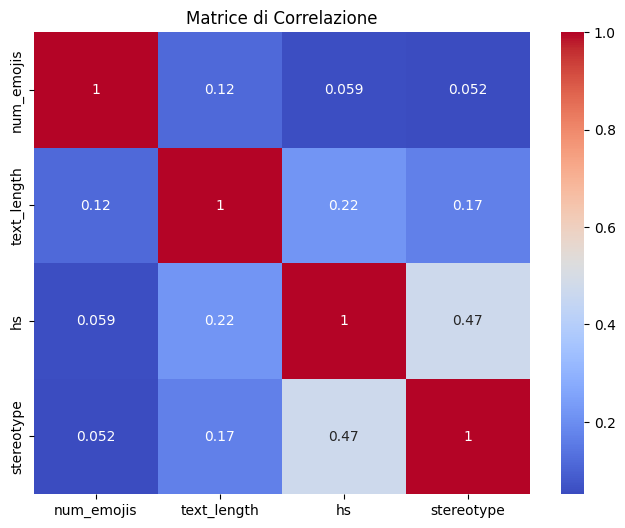

In [17]:
# Aggiungi nuove colonne per le analisi
df['num_emojis'] = df['all_emoticons_emojis'].apply(lambda x: len(x.split()))  # Conta emoji
df['text_length'] = df['text '].apply(len)  # Lunghezza del testo

# Se `hs` e `stereotype` sono numerici, calcola la matrice di correlazione
correlation_matrix = df[['num_emojis', 'text_length', 'hs', 'stereotype']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice di Correlazione')
plt.show()


# INIZIO PROCEDURA TF-IDF

In [18]:
# Funzione per rimuovere duplicati rispettando l'ordine originale
def remove_duplicates(text):
    if not text:
        return ''
    seen = set()
    return ''.join([char for char in text if not (char in seen or seen.add(char))])

# Applica la funzione per rimuovere i duplicati
df['unique_emojis'] = df['all_emoticons_emojis'].apply(remove_duplicates)


In [19]:
df.drop(columns=['num_emojis'], inplace=True)
df.drop(columns=['text_length'], inplace=True)
df.drop(columns=['all_emoticons_emojis'], inplace=True)

In [20]:
df

,id,text,hs,stereotype,unique_emojis
0,2066,"È terrorismo anche questo, per mettere in uno ...",0,0,
1,2045,infatti finché ci hanno guadagnato con i campi...,0,0,
2,61,"Corriere: Tangenti, Mafia Capitale dimenticata...",0,0,
3,1259,"ad uno ad uno, perché quando i migranti israel...",0,0,
4,949,Il divertimento del giorno? Trovare i patrioti...,0,0,
...,...,...,...,...,...
6832,9340,Gli stati nazionali devono essere pronti a rin...,0,0,
6833,9121,Il ministro dell'interno della Germania facend...,0,0,
6834,8549,"In Italia troppi si sono montati la testa, io ...",0,0,
6835,9240,Chi giubila in buona fede non ha capito niente...,0,0,


In [21]:
import emoji
import re

# Regex per rilevare le emoticon più comuni
emoticon_pattern = re.compile(r"""
    (?:
    :\)|:-\)|\(:|\(-:     # Sorriso
    |:\(|:-\(|\):|\)-:     # Triste
    |:D|:-D|D:|D-:         # Risata
    |;\)|;-\)|\(;|\(-;     # Occhiolino
    |:'\(|:'-\(            # Piangente
    |:P|:-P|P:|P-:         # Giocoso
    |:o|:-o|O:|O-:         # Sorpreso
    |XD|X-D                # Risata forte
    |:/|:-/                # Confuso
    )
""", re.VERBOSE)

# Funzione per mappare le emoticon ai nomi
def emoticon_to_name(emoticon):
    emoticon_dict = {
        ":)": "smile",
        ":-)": "smile",
        "(:": "smile",
        "(-:": "smile",
        ":(": "sad",
        ":-(": "sad",
        "):": "sad",
        ")-:": "sad",
        ":D": "laugh",
        ":-D": "laugh",
        "D:": "laugh",
        "D-:": "laugh",
        ";)": "wink",
        ";-)": "wink",
        "(;": "wink",
        "(-;": "wink",
        ":'(": "cry",
        ":'-(": "cry",
        ":P": "playful",
        ":-P": "playful",
        "P:": "playful",
        "P-:": "playful",
        ":o": "surprised",
        ":-o": "surprised",
        "O:": "surprised",
        "O-:": "surprised",
        "XD": "laughing hard",
        "X-D": "laughing hard",
        ":/": "confused",
        ":-/": "confused"
    }
    return emoticon_dict.get(emoticon, "unknown emoticon")

# Funzione per trasformare emoji ed emoticon in nomi leggibili
def convert_to_names(text):
    if not text:
        return ''
    # Converte le emoji in nomi e aggiunge uno spazio dopo ogni emoji
    text = emoji.demojize(text)
    text = re.sub(r':(.*?):', lambda m: f"{m.group(1).replace('_', ' ')} ", text)
    # Rileva e converte le emoticon (senza aggiungere spazi)
    text = re.sub(emoticon_pattern, lambda m: emoticon_to_name(m.group()), text)
    return text.strip()

# Applica la funzione alla colonna `unique_emojis`
df['emojis_names'] = df['unique_emojis'].apply(convert_to_names)

In [22]:
df

,id,text,hs,stereotype,unique_emojis,emojis_names
0,2066,"È terrorismo anche questo, per mettere in uno ...",0,0,,
1,2045,infatti finché ci hanno guadagnato con i campi...,0,0,,
2,61,"Corriere: Tangenti, Mafia Capitale dimenticata...",0,0,,
3,1259,"ad uno ad uno, perché quando i migranti israel...",0,0,,
4,949,Il divertimento del giorno? Trovare i patrioti...,0,0,,
...,...,...,...,...,...,...
6832,9340,Gli stati nazionali devono essere pronti a rin...,0,0,,
6833,9121,Il ministro dell'interno della Germania facend...,0,0,,
6834,8549,"In Italia troppi si sono montati la testa, io ...",0,0,,
6835,9240,Chi giubila in buona fede non ha capito niente...,0,0,,


#TROVARE GLI N-GRAMMI POSSIBILI

In [23]:
from collections import Counter
import pandas as pd
import plotly.express as px
from nltk.util import ngrams  # Libreria per generare n-grammi

# Funzione per trovare gli n-grammi dato un elenco di nomi di emoji
def find_emoji_name_ngrams(emoji_name_list, n):
    """
    Genera n-grammi da una lista di nomi di emoji.

    Parametri:
        emoji_name_list: lista di nomi di emoji (es. ['smile', 'sad', 'laugh'])
        n: lunghezza dell'n-gramma

    Ritorna:
        Una lista di n-grammi.
    """
    return list(ngrams(emoji_name_list, n))

# Funzione per generare n-grammi per una gamma di valori n
def generate_ngrams_for_range(emoji_name_list, min_n=1, max_n=5):
    """
    Genera n-grammi per una gamma di valori di n.

    Parametri:
        emoji_name_list: lista di nomi delle emoji
        min_n: lunghezza minima degli n-grammi
        max_n: lunghezza massima degli n-grammi

    Ritorna:
        Un dizionario con n come chiave e un Counter di n-grammi come valore.
    """
    ngram_counters = {n: Counter() for n in range(min_n, max_n + 1)}

    for n in range(min_n, max_n + 1):
        ngrams_list = find_emoji_name_ngrams(emoji_name_list, n)
        ngram_counters[n].update(ngrams_list)

    return ngram_counters

# Trasforma la colonna `emojis_names` in liste di parole
df['emoji_name_list'] = df['emojis_names'].apply(lambda x: x.split())

# Parametri per gli n-grammi
min_n = 1  # Lunghezza minima
max_n = 5  # Lunghezza massima

# Generazione automatica degli n-grammi
all_ngrams = {n: Counter() for n in range(min_n, max_n + 1)}
for emoji_name_list in df['emoji_name_list']:
    ngram_counters = generate_ngrams_for_range(emoji_name_list, min_n, max_n)
    for n in range(min_n, max_n + 1):
        all_ngrams[n].update(ngram_counters[n])

# Mostra i migliori n-grammi per ogni valore di n
print("\nTop n-grammi per ogni valore di n:")
for n in range(min_n, max_n + 1):
    print(f"\nTop {n}-grammi:")
    for ngram, freq in all_ngrams[n].most_common(5):  # Top 5 n-grammi per ogni n
        print(f"{' '.join(ngram)}: {freq}")

# Trova il valore ottimale di n in base a una metrica (esempio: numero totale di n-grammi)
optimal_n = max(all_ngrams, key=lambda n: sum(all_ngrams[n].values()))
print(f"\nIl valore ottimale di n (basato sulla frequenza totale): {optimal_n}")

# Visualizza i n-grammi ottimali in un grafico
optimal_ngrams = all_ngrams[optimal_n]
optimal_ngrams_df = pd.DataFrame(optimal_ngrams.items(), columns=['N-gram', 'Frequency']).sort_values(by='Frequency', ascending=False)
optimal_ngrams_df['N-gram'] = optimal_ngrams_df['N-gram'].apply(lambda x: ' '.join(x))  # Converte il tuple in stringa leggibile

fig = px.bar(
    optimal_ngrams_df.head(10),
    x='N-gram',
    y='Frequency',
    title=f'Top {optimal_n}-grammi nei Nomi delle Emoji',
    labels={'N-gram': f'{optimal_n}-gramma', 'Frequency': 'Frequenza'}
)
fig.show()



Top n-grammi per ogni valore di n:

Top 1-grammi:
face: 221
with: 89
of: 37
smiling: 35
eyes: 28

Top 2-grammi:
face with: 89
enraged face: 28
with tears: 24
tears of: 24
of joy: 24

Top 3-grammi:
face with tears: 24
with tears of: 24
tears of joy: 24
face with smiling: 18
with smiling eyes: 18

Top 4-grammi:
face with tears of: 24
with tears of joy: 24
face with smiling eyes: 18
beaming face with smiling: 12
rolling on the floor: 11

Top 5-grammi:
face with tears of joy: 24
beaming face with smiling eyes: 12
rolling on the floor laughing: 11
face with steam from nose: 5
face with symbols on mouth: 4

Il valore ottimale di n (basato sulla frequenza totale): 1


# TF-IDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import plotly.express as px
import re

# 1. Preprocessa i dati: la colonna `emojis_names` contiene i nomi delle emoji già convertiti
# Nessun ulteriore preprocessing richiesto qui

# 2. Estrai solo i nomi delle emoji da `emojis_names`
def extract_emoji_names_only(text):
    """
    Estrai solo i nomi delle emoji da un testo con nomi emoji (già pulito).
    """
    return ' '.join(re.findall(r"\b\w+\b", text))  # Mantiene solo parole alfanumeriche

df['emoji_name_text'] = df['emojis_names'].apply(extract_emoji_names_only)

# 3. Calcola TF-IDF sui nomi delle emoji
def calculate_tfidf_on_emoji_names(texts, min_n=1, max_n=3):
    """
    Calcola TF-IDF sui nomi delle emoji, considerando diverse lunghezze di n-grammi.

    Parametri:
        texts: Lista di stringhe contenenti solo i nomi delle emoji.
        min_n: Lunghezza minima degli n-grammi.
        max_n: Lunghezza massima degli n-grammi.

    Ritorna:
        Un DataFrame con n-grammi e il loro TF-IDF medio sui documenti.
    """
    # Usa TfidfVectorizer per generare n-grammi e calcolare TF-IDF
    vectorizer = TfidfVectorizer(ngram_range=(min_n, max_n), token_pattern=r'\b\w+\b')
    X = vectorizer.fit_transform(texts)

    # Estrai i n-grammi
    ngrams = vectorizer.get_feature_names_out()

    # Calcola la media TF-IDF per ogni n-gramma
    tfidf_values = np.mean(X.toarray(), axis=0)

    # Crea un DataFrame con i risultati
    tfidf_df = pd.DataFrame({
        'N-gram': ngrams,
        'TF-IDF': tfidf_values
    }).sort_values(by='TF-IDF', ascending=False)

    return tfidf_df

# 4. Esegui TF-IDF sui nomi delle emoji
texts = df['emoji_name_text'].tolist()  # Solo i nomi delle emoji
tfidf_results = calculate_tfidf_on_emoji_names(texts, min_n=1, max_n=3)

# 5. Mostra i risultati
print("Top N-grammi sui nomi delle emoji (TF-IDF):")
print(tfidf_results.head(10))

# 6. Visualizza i n-grammi più rilevanti con TF-IDF
fig = px.bar(
    tfidf_results.head(10),
    x='N-gram',
    y='TF-IDF',
    title='Top N-grammi sui Nomi delle Emoji con TF-IDF',
    labels={'N-gram': 'N-gramma', 'TF-IDF': 'TF-IDF'}
)
fig.show()


Top N-grammi sui nomi delle emoji (TF-IDF):
           N-gram    TF-IDF
180          face  0.007609
231     face with  0.002543
724          with  0.002543
133  enraged face  0.002165
132       enraged  0.002165
346         italy  0.002142
603       smiling  0.001364
450            of  0.001342
760            xo  0.001316
653      thinking  0.001262
